In [144]:
# Logistic regression as a method for classification
# Logistic Regression allows us to solve classification problems
# Binary Classification: 0 and 1

#Evaluation of a logistic regression model uses a confusion matrix, a table used to describe the performance of the classification model on a set of test data for which the true values are known
#True Positives: predicted yes, reality also yes 
#True Negatives: predicted no, reality also no
#False Positives or Type 1 error: predicted yes, reality no
#False Negatives or Type 2 error: predicted no, reality yes

# Accuracy: (True Positives + True Negatives) / total

#Misclassification Rate, how often is the model wrong: (False Positives + False Negatives) / total

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
train_data = pd.read_csv('titanic_train.csv')

In [162]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
#check for missing data
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

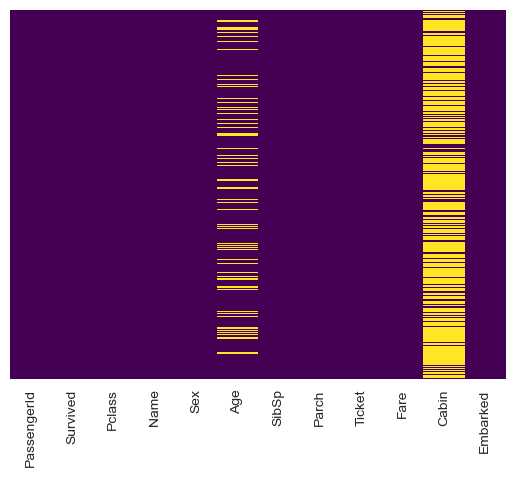

In [166]:
#check for null using heatmap to know which data to focus on
sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

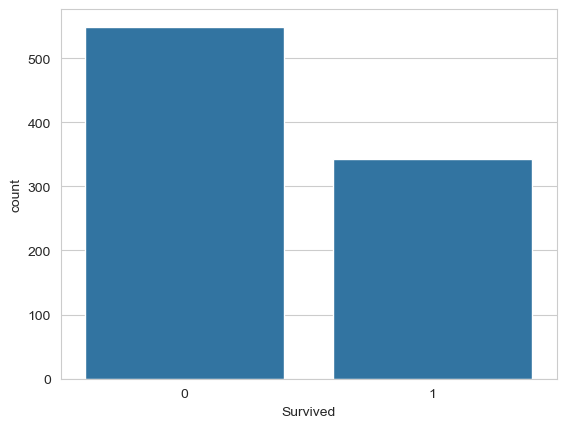

In [169]:
#checking survival rate with a count plot
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

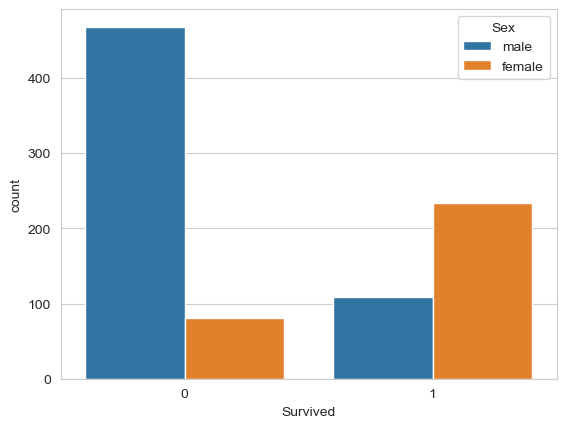

In [171]:
#checking survival rate with a count plot based on sex as in the dataset, so you can use any 'hue' based on your dataset
sns.countplot(x='Survived', data=train_data, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

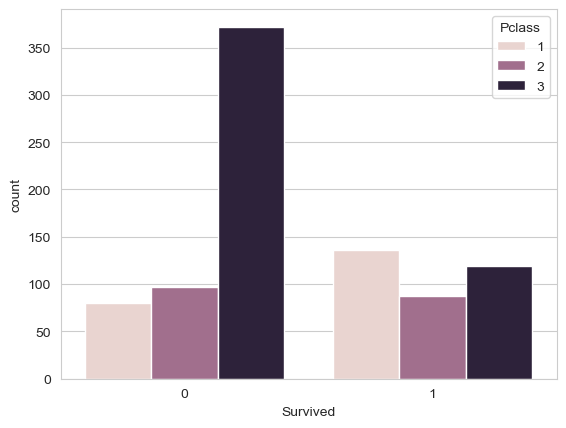

In [173]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

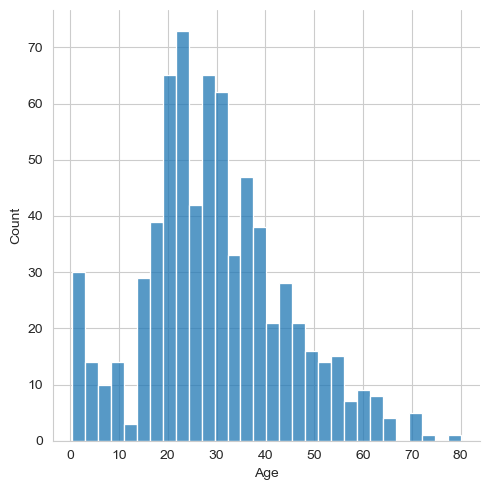

In [174]:
#mapping age, dropna to remove all NaNs in the age column, also bins= number of blocks ib the histogram
sns.displot(train_data['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

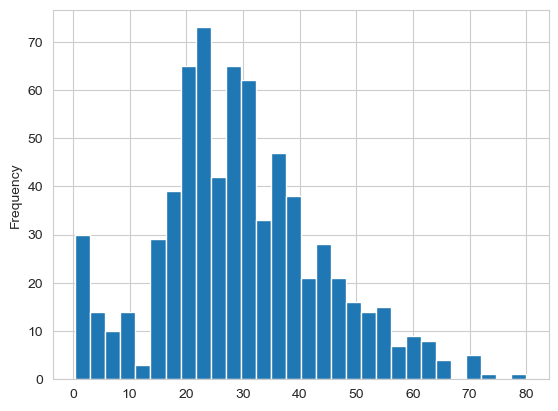

In [176]:
#use pandas visualisation
train_data['Age'].plot.hist(bins=30)

In [179]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

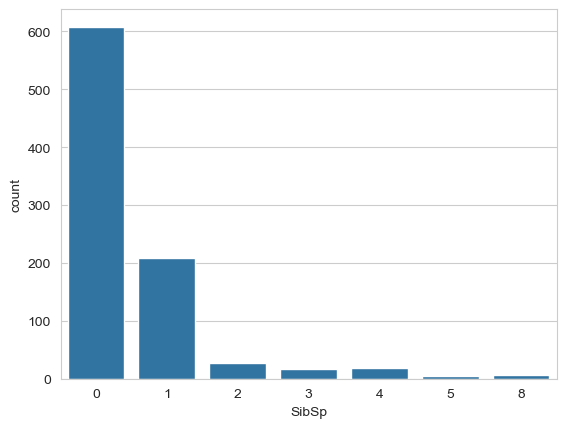

In [181]:
#number of siblins/spouses onboard, 
#remember, the data comes from the dataset
sns.countplot(x='SibSp', data=train_data)

<Axes: ylabel='Frequency'>

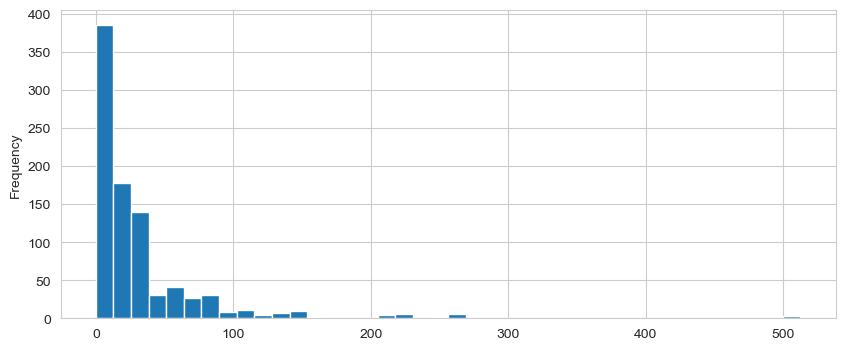

In [183]:
train_data['Fare'].plot.hist(bins=40, figsize=(10,4))

In [184]:
#use cufflinks for an interactive plot
import cufflinks as cf

In [187]:
cf.go_offline()

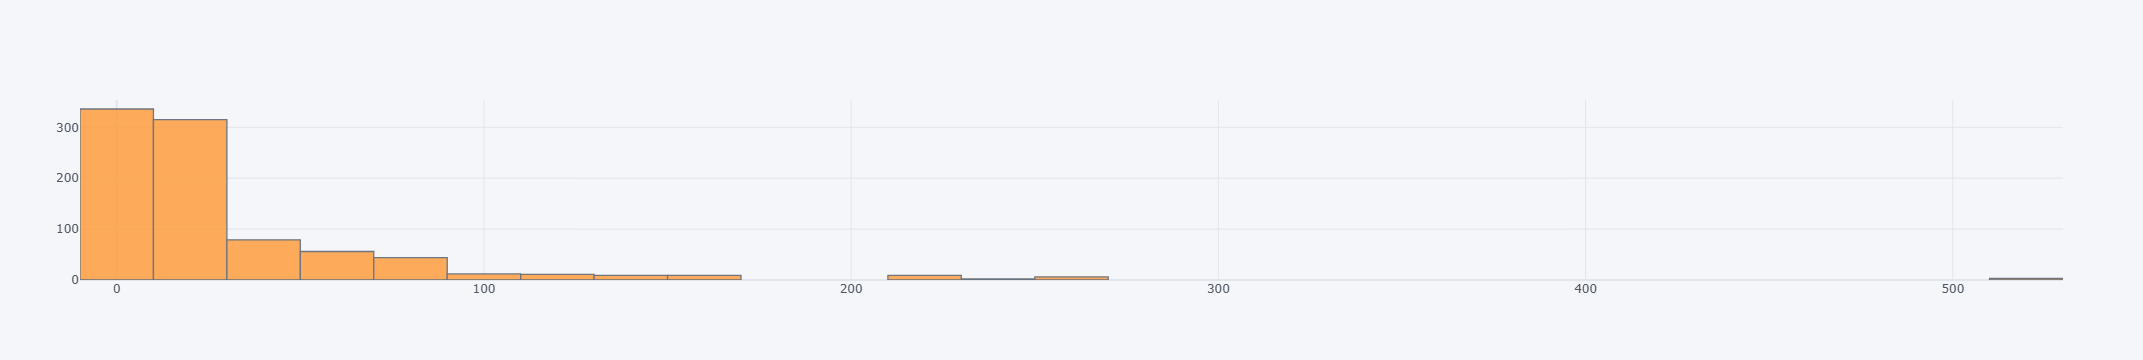

In [189]:
train_data ['Fare'].iplot(kind='hist',bins=50)

In [193]:
#Cleaning Data

<Axes: >

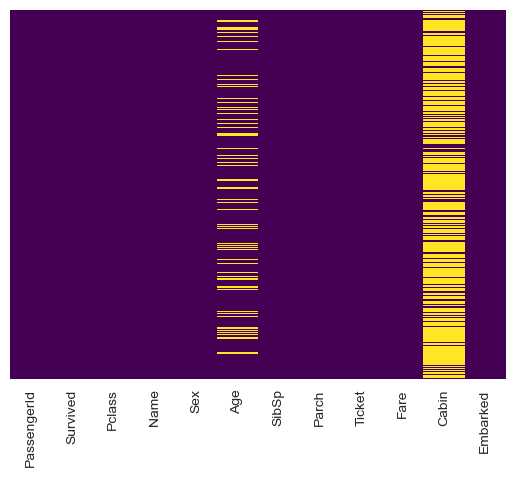

In [195]:
#use heatmap to check missing data
sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

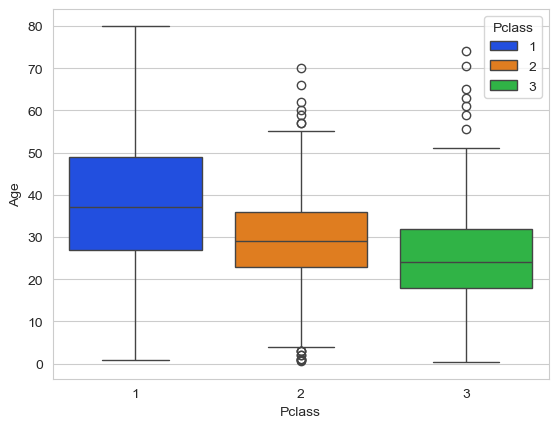

In [197]:
#since age isnt missing most of its data, let fix that by imputating the missing values
#first, use a boxplot to check the mean of age and the passenger class
#hue = graph legend
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='bright', hue='Pclass')

In [199]:
#finding the mean for age for each class to estimate missing age values
#using age and passenger class as parameters
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24  #these values come from the mean ages for each passenger class as shown in the box graph
    else:
        return Age

In [201]:
#use the funtion to populate NaNs in the age column in the dataset
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1) #axis = 1 because it should be applied to all columns

C:\Users\aduko\AppData\Local\Temp\ipykernel_15720\3485724488.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\aduko\AppData\Local\Temp\ipykernel_15720\3485724488.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

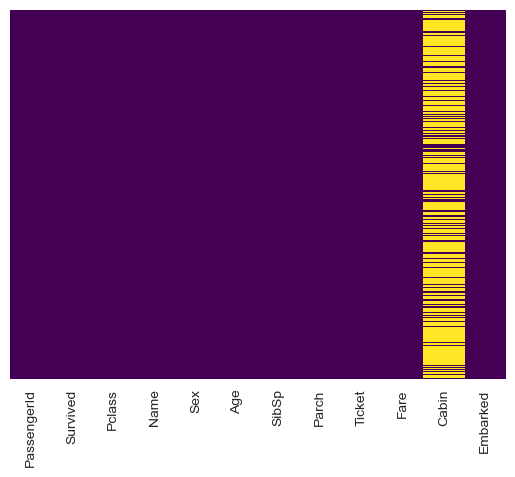

In [203]:
#redo heatmap to check for null
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [205]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
#drop cabin because it has too much missing data to do anything useful with
train_data.drop('Cabin',axis=1,inplace=True)

In [209]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

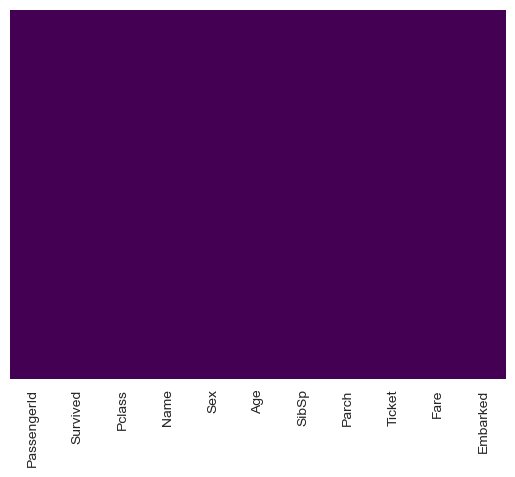

In [211]:
#run heatmap again to check
#First step of cleaning data is dealing with missing values
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [248]:
#Second Step, deal with categorical features, converting strings into zeros and ones (aka dummy variables) so pandas can read them properly
#ALso avoid multicollinearity, which occurs when independent variables in a regression model are correlated, meaning they are not independent of each other.
#if you do this with sex, the value for female 100% predcits the value for male which is bad
# in this case we removed by using drop_first
sex=pd.get_dummies(train_data['Sex'], dtype=int, drop_first=True)

In [250]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [240]:
#did same with the embark column to remove the perfect predictor
embark = sex=pd.get_dummies(train_data['Embarked'], dtype=int,drop_first=True)

In [242]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [253]:
#add new columns to the dataset
train_data = pd.concat([train_data,sex,embark], axis=1)

In [257]:
train_data.head(2) #letters in embark column represents cities, so we created a clumn for each letter with binary values for processing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [261]:
#dropping columns we're not gonna use, these are columns filled with string values
#no way for regression algos to read strings
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [263]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [265]:
train_data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [267]:
#dropping possengerID too, its a index location value, nothing relevant
train_data.drop(['PassengerId'], axis=1, inplace=True)

In [269]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [271]:
train_data.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,24.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


In [312]:
#Training model
#X = train_data[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

#features shortcut, drop the target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived'] #target

In [314]:
from sklearn.model_selection import train_test_split

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [318]:
from sklearn.linear_model import LogisticRegression

In [320]:
logmodel = LogisticRegression(max_iter=1000)

In [322]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [324]:
predictions = logmodel.predict(X_test)

In [326]:
#testing and evaluating model
from sklearn.metrics import classification_report

In [328]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [332]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [334]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]], dtype=int64)